In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import networkx as nx
import os
import pandas as pd
import time
import json

In [4]:
path = "../outputs"
f = "path_21946_infos.json"

In [17]:
with open(os.path.join(path,f),"r") as infile:
    infos = json.load(infile)

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(infos["pipeline"])):
    print(infos["pipeline"][i])
    costs = np.array(infos["data"][i]["edgecosts"])
    path = np.array(infos["data"][i]["path_cells"])
    plt.plot(path[:,0], path[:,1], label=i)
    print(np.sum(costs, axis=0))
    print(infos["data"][i]["time_logs"])
plt.legend()
plt.show()

In [2]:
path = "../outputs"

In [27]:
times = pd.read_csv(os.path.join(path, "watershed_comp/time_tests.csv")) # "time_tests_compare1.csv"))

## Scale 2 comparison

In [18]:
direct = times[times["id"].str.contains("direct")]

In [19]:
overall_times = times[times["time_pipeline"]!=0]

In [8]:
# out_costs = np.array([eval(c) for c in times["cost_sum"]])

In [9]:
times.columns

Index(['id', 'scale', 'graphtype', 'pipeline', 'n_nodes', 'n_edges',
       'add_nodes_time', 'add_edge_time', 'shortest_path_time', 'sp_tree_time',
       'ksp_time', 'pareto_time', 'downsample_time', 'cult_costs', 'hum_costs',
       'plan_costs', 'tech_costs', 'cost_sum', 'time_pipeline'],
      dtype='object')

In [30]:
agg_dict = {"n_edges":"max", "add_edge_time":"sum", "shortest_path_time":"sum","downsample_time":"sum", "cost_sum":"min", "time_pipeline":"max"}
#  "pareto_time":"sum", "ksp_time":"sum", "sp_tree_time":"sum",
max_edges = times.groupby("id").agg(agg_dict).reset_index()

In [32]:
# times.groupby('id')['dist'].apply(list)
max_edges["cost_sum"] = list(times.groupby('id')['cost_sum'].apply(list))
# max_edges["factos"] = list(times.groupby('id')['sample_factor'].apply(list))

In [22]:
df_plot = times[["id", "cost_sum", ]]

In [ ]:
ax = max_edges.plot.bar(x='id', y='n_edges', rot=0, figsize=(15,5))


## Bar plot of costs

In [24]:
def plot_comparison(var):
    costs = times.groupby('id')[var].apply(list)
    co = np.array(costs)
    max_len = max([len(c) for c in co])
    new_list = [l + [l[-1] for _ in range(max_len-len(l))] for l in co]
    new_df = pd.DataFrame(data = new_list, columns=[str(i) for i in range(max_len)])
    new_df["id"] = np.unique(times["id"])
    ax = new_df.plot.bar(x='id', figsize=(15,5))

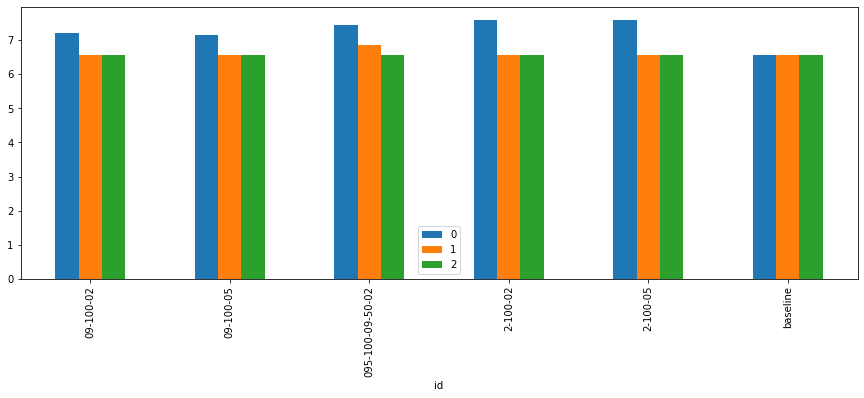

In [25]:
plot_comparison("cost_sum")

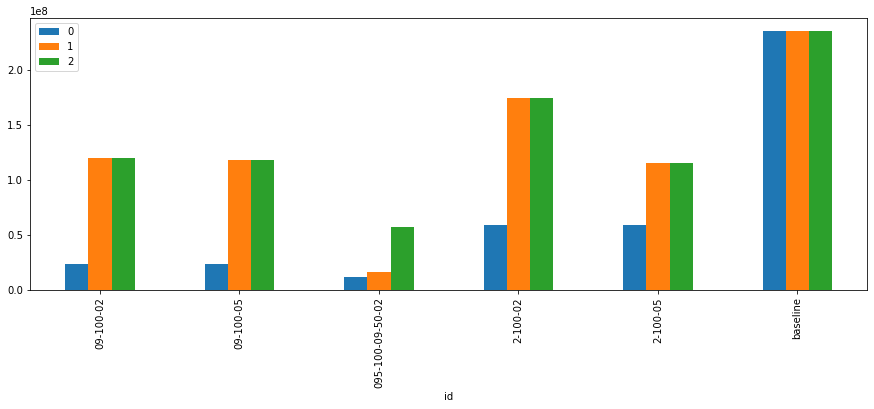

In [26]:
plot_comparison("n_edges")

## Check outputs qualitatively:

In [ ]:
instance_path = "../data/data_dump_1.dat"
with open(instance_path, "rb") as infile:
    data = pickle.load(infile)
(instance, instance_corr, start_inds, dest_inds) = data.data

In [ ]:
paths = []
for json_file in ["path_norm-1-direct_infos.json", "path_norm_1_pipe_infos.json", "path_random_1_pipe_infos.json"]:
    with open("../outputs/"+json_file, "r") as infile:
        infos = json.load(infile)
        print(json_file)
        costs = infos["data"][-1]["edgecosts"]
        print(np.sum(np.array(costs), axis=0), np.sum(np.array(costs)))
        paths.append(np.array(infos["data"][-1]["path_cells"]))

### Double check costs

In [ ]:
for i, path in enumerate(paths):
    costs = []
    for p in path:
        cost = instance[:, p[0], p[1]]
        costs.append(cost)
    print(np.sum(np.array(costs), axis=0))

### Color paths in image

In [ ]:
expanded = np.expand_dims(instance_corr*instance[2], axis=2)
expanded = np.tile(expanded, (1, 1, 3)) 
buffer = 2
for i, path in enumerate(paths[:3]):
    col = np.zeros(3)
    col[i] = 1
    for p in path:
        x = p[0]
        y = p[1]
        expanded[x - buffer:x + buffer + 1,
                 y - buffer:y + buffer + 1]  = col

In [ ]:
red = normal

green = norm pipe

blue = random pipe

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(np.swapaxes(expanded, 1, 0))

### Time tests

In [ ]:
# min and argmin at same time
def original_app(A):
    min_idx = np.argmin(A,axis=0)
    min_val = np.amin(A,axis=0)
    return min_idx, min_val

def proposed_app(A):
    min_idx = np.argmin(A,axis=0)
    min_val = np.take_along_axis(A, min_idx[None,:,:], axis=0)[0,:,:]
    return min_idx, min_val


A = np.random.randint(0,99,(40,400,500))
%timeit original_app(A)
%timeit proposed_app(A)

## Check average distance on out path

2
23.44796037531516 min: 16.1245154965971
2
23.88907334236418 min: 16.492422502470642


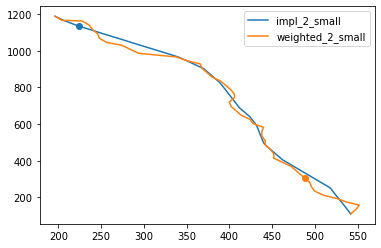

In [19]:
path_in = "../../outputs"
found_paths = []
for f in ["impl_2_small", "weighted_2_small"]:
    with open(os.path.join(path_in,f+"_infos.json"),"r") as infile:
        infos = json.load(infile)
    # print(infos["data"][0]["path_cells"])
    print(infos["scale"])
    found_paths.append(infos["data"][0]["path_cells"])
    # get path
    path = np.asarray(infos["data"][0]["path_cells"])
    # plot
    plt.plot(path[:,0], path[:,1], label=f)
    # get dists
    dists = []
    for p in range(len(path)-1):
         dists.append(np.linalg.norm(path[p]-path[p+1]))
    print(np.mean(dists), "min:", np.min(dists))
    a = np.where(np.array(dists)<17)
    plt.scatter(path[a,0], path[a,1])
plt.legend()
plt.show()

In [ ]:
for path in found_paths:
    path = np.asarray(path)
    # plt.plot(path[:,0], path[:,1])
    dists = []
    for p in range(len(path)-1):
         dists.append(np.linalg.norm(path[p]-path[p+1]))
    # print(dists)
    print("smaller 17:", np.where(np.array(dists)<17))
    plt.hist(dists)
    plt.show()

# Evaluate non-normalized costs

In [11]:
import os
import pickle
import rasterio
from power_planner.utils.utils import normalize, bresenham_line, discrete_angle_costs, angle
from power_planner.utils.utils_costs import CostUtils
from power_planner.utils.utils_constraints import ConstraintUtils

In [2]:
layer_path = "../../data/instance_DE.nosync/tif_layers" # belgium.nosync/tif_layers"
csv_path = "../../data/instance_DE.nosync/layer_weights.csv" # /belgium.nosync/layer_weights.csv"
json_path = "../../outputs/de_call_with_planner" # paths_compare"


In [9]:
def get_raw_data(layer_path, csv_path, scenario=1):
    layer_list = pd.read_csv(csv_path).dropna()
    # layer_list = layer_csv[layer_csv["weight_" + str(scenario)] != "Forbidden"]
    layer_arr = []
    layer_weights, layer_names, layer_classes = [], [], []
    forb_arr = []
    for i, row in layer_list.iterrows():
        file_path = os.path.join(
            layer_path, row["Layer Name"] + ".tif"
        )
        if os.path.exists(file_path):
            with rasterio.open(file_path, 'r') as ds:
                arr = ds.read()[0]
            # binarize single tif layer so it can be weighted
            # -1  because in tifs the costly areas are black
            arr = arr[:3078, :3724]
            # add to hard constraints or general instance
            if row["weight_" + str(scenario)]=="Forbidden":
                constraint = (arr.astype(int) != 1).astype(int)
                forb_arr.append(constraint)
                print(constraint.shape)
            else:
                costs = (arr==1).astype(int)
                # costs = np.absolute(normalize(arr) - 1)
                layer_arr.append(costs)
                layer_weights.append(int(row["weight_" + str(scenario)])*int(row["category_weight_" + str(scenario)]))
                layer_classes.append(row["class"])
                layer_names.append(row["Layer Name"]) # ["Corresponding Name"])
        else:
            print("file not found:", row["Layer Name"])
    df = pd.DataFrame()
    df["weights"] = layer_weights
    df["arr_inds"] = [i for i in range(len(layer_arr))]
    df["class"] = layer_classes
    df["layer"] = layer_names
    layer_arr = np.asarray(layer_arr)
    if len(forb_arr)==0:
        forb_arr = np.ones(layer_arr.shape)
    return np.swapaxes(layer_arr,2,1), np.swapaxes(np.array(forb_arr), 2,1), df

### Display hard constraints

In [3]:
def display_paths(forbidden_arr, paths):
    plt.figure(figsize=(20,10))
    plt.imshow(np.all(forbidden_arr.astype(int), axis=0), cmap=plt.get_cmap("gist_gray"))
    plt.colorbar()
    for path in paths:
        plt.scatter(path[:,1], path[:,0])
    plt.show()

#### Check if forbidden layers used

In [4]:
def assert_forbidden(forbidden_arr, paths):
    for l,f in enumerate(forbidden_arr):
        for (i,j) in path:
            assert f[i,j] >0, f"forbidden: layer {l} cell {i} {j}"

def assert_forbidden_inst(forbidden_arr, path):
    for (i,j) in path:
        assert forbidden_arr[i,j] >0, f"forbidden: cell {i} {j}"

### Compute absolute costs

#### Vertex costs

In [5]:
def pylon_costs(layer_arr, path):
    pylons = []
    for l in range(len(layer_arr)):
        pylons.append(np.sum([layer_arr[l,i,j] for (i,j) in path]))
    return pylons

#### Cable costs

In [6]:
def cable_costs(layer_arr, path):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # edge costs
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            path_edges.extend(line[1:-1])
        edge_costs.append(np.sum([layer_arr[l,i,j] for (i,j) in path_edges]))
    return edge_costs

def edge_costs(layer_arr, path):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # get connection line between two paths
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            # take the mean of each segment
            path_edges.append(np.mean([layer_arr[l,i,j] for (i,j) in line[1:-1]]))
        edge_costs.append(np.sum(path_edges))
    return edge_costs

#### Angle costs

In [7]:
# angle costs
def angle_costs(path):
    angle_costs = []
    for p in range(len(path)-2):
        vec1 = path[p + 1] - path[p]
        vec2 = path[p + 2] - path[p + 1]
        angle_costs.append(angle(vec1, vec2))
    sum_angle = np.sum(angle_costs)
    return round(sum_angle, 2)

### Normalized costs

In [8]:
from power_planner.utils.utils import normalize

In [12]:
normed_per_class = []
for class_name, df_grouped in df.groupby(["class"]):
    layer_inds = df_grouped["arr_inds"].astype(int)
    relevant_layers = arr[layer_inds]
    group_weights = df_grouped["weights"].values.astype("float")
    weighted_layers = np.sum(np.array([relevant_layers[i] * group_weights[i] for i in range(len(group_weights))]), axis=0)
    normed_per_class.append(normalize(weighted_layers))
normed_per_class = np.asarray(normed_per_class)


In [13]:
with open("../data/belgium_dump_1.dat", "rb") as infile:
    data = pickle.load(infile)
    (instance, instance_corr, start_inds, dest_inds) = data.data

In [34]:
start_inds

array([542, 111])

In [15]:
instance.shape, normed_per_class.shape

((4, 739, 1300), (4, 1511, 1313))

# Start analysis

### Get layers and weights

In [12]:
arr, forb, df = get_raw_data(layer_path, csv_path)

(3078, 3724)
(3078, 3724)


In [13]:
print(arr.shape, forb.shape)
df

(37, 3724, 3078) (2, 3724, 3078)


,weights,arr_inds,class,layer
0,36,0,Siedlungswesen,I_1111_Wohnumfeldschutz
1,24,1,Siedlungswesen,I_1121_Einschraenkung_oertl_Entwicklungsabsichten
2,12,2,Siedlungswesen,I_1123_Versorgungsflaechen_Bestand
3,12,3,Siedlungswesen,I_1124_Entsorgungsanlagen
4,12,4,Siedlungswesen,I_1125_Sondergebiete_EKZ_PV
5,24,5,Erholung und Tourismus,I_1211_Sondergebiete_Erholung
6,16,6,Erholung und Tourismus,I_1212_Sondergebiete_Erholung_200m
7,16,7,Erholung und Tourismus,I_1213_Freizeit_regionale_Bedeutung
8,30,8,Natur und Landschaft,I_1311_Landschaftl_Vorbehaltsgebiet
9,30,9,Natur und Landschaft,I_1313_Regionaler_Gruenzug


### Get output path

In [32]:
# read in ksp from one file
with open(os.path.join(json_path, "chinst_scale2_scen1_a4_path_orig.json"), "r") as infile:
    b_path = json.load(infile)
path_list = [np.asarray(p) for p in b_path]
json_names = ["ksp_"+str(i) for i in range(len(path_list))]

In [19]:
# read in several files
json_names = ["ch_inst_test_orig.json"]
# ["impl_0e_3a.json", "impl_2e_2a.json", "impl_3e_0a.json", "impl_parcel_2e_2a.json"]
# ["impl_lg.json", "normal.json",  "impl_5e_1a.json"] # "edge_cost_2_orig.json" - does not work because scale 2 -> forbidden areas (can still take it but will give assertion error)
path_list = []
for j_name in json_names:
    with open(os.path.join(json_path, j_name), "r") as infile:
        path_list.append(np.array(json.load(infile)[0]))
print(f"loaded {len(path_list)} paths")

loaded 1 paths


#### New version: from csv files

In [16]:
json_names = ["laplace_e3_d80de_0.csv", "fast_e5_d70_de_1.csv", "fast_e5_d70_de_2.csv"]
path_list = []
for csv in json_names:
    path_arr = np.asarray(pd.read_csv(os.path.join(json_path, csv))[["X_raw", "Y_raw"]]).astype(int)
    path_list.append(path_arr)

### Plot

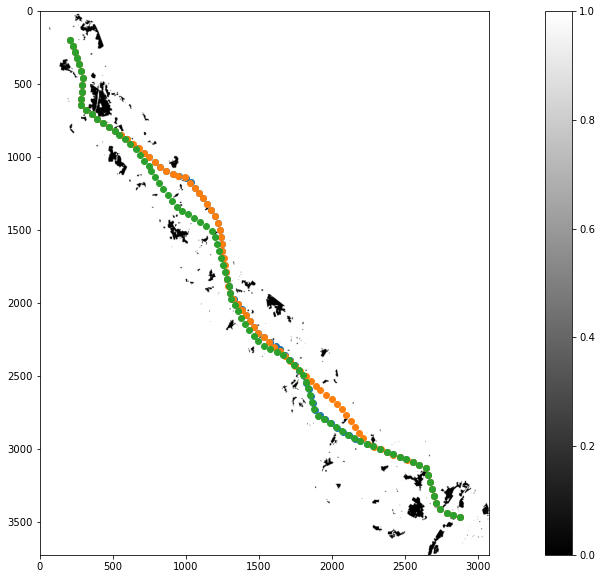

In [17]:
display_paths(forb, path_list)

In [18]:
for path in path_list:
    assert_forbidden(forb, path)
    # path2 = np.array(path)-shift_to_origin
    # assert_forbidden_inst(instance_corr, path2)

In [19]:
results_df = df.copy()
angle_dict = {"weights":0,"arr_inds":"-", "class":"ANGLE", "layer":"Sum of angles (radial)"}
for name, path in zip(json_names,path_list):
    results_df[(name.split(".")[0], "pylon_cost")] = pylon_costs(arr, path)
    results_df[(name.split(".")[0], "cable_costs")] = cable_costs(arr, path)
    results_df[(name.split(".")[0], "edge_costs")] = edge_costs(arr,path)
    angle_dict[(name.split(".")[0], "edge_costs")] = angle_costs(path)
    angle_dict[(name.split(".")[0], "cable_costs")] = angle_costs(path)
    angle_dict[(name.split(".")[0], "pylon_cost")] = angle_costs(path)
# add angles
print(angle_dict)
results_df.loc[-1] = angle_dict

{'weights': 0, 'arr_inds': '-', 'class': 'ANGLE', 'layer': 'Sum of angles (radial)', ('laplace_e3_d80de_0', 'edge_costs'): 7.74, ('laplace_e3_d80de_0', 'cable_costs'): 7.74, ('laplace_e3_d80de_0', 'pylon_cost'): 7.74, ('fast_e5_d70_de_1', 'edge_costs'): 7.18, ('fast_e5_d70_de_1', 'cable_costs'): 7.18, ('fast_e5_d70_de_1', 'pylon_cost'): 7.18, ('fast_e5_d70_de_2', 'edge_costs'): 8.0, ('fast_e5_d70_de_2', 'cable_costs'): 8.0, ('fast_e5_d70_de_2', 'pylon_cost'): 8.0}


In [20]:
# results_df[(results_df[[("impl_0e_3a", "cable_costs"),("impl_2e_2a", "cable_costs"),("impl_3e_0a", "cable_costs")]].T != 0).any()].drop(columns=["arr_inds"])
results_df

,weights,arr_inds,class,layer,"(laplace_e3_d80de_0, pylon_cost)","(laplace_e3_d80de_0, cable_costs)","(laplace_e3_d80de_0, edge_costs)","(fast_e5_d70_de_1, pylon_cost)","(fast_e5_d70_de_1, cable_costs)","(fast_e5_d70_de_1, edge_costs)","(fast_e5_d70_de_2, pylon_cost)","(fast_e5_d70_de_2, cable_costs)","(fast_e5_d70_de_2, edge_costs)"
0,36,0,Siedlungswesen,I_1111_Wohnumfeldschutz,5.00,574.00,14.291348,7.00,609.00,15.433065,4.0,408.0,10.004778
1,24,1,Siedlungswesen,I_1121_Einschraenkung_oertl_Entwicklungsabsichten,4.00,213.00,5.393780,4.00,222.00,5.790241,4.0,187.0,4.920706
2,12,2,Siedlungswesen,I_1123_Versorgungsflaechen_Bestand,2.00,23.00,0.555556,2.00,23.00,0.555556,2.0,23.0,0.555556
3,12,3,Siedlungswesen,I_1124_Entsorgungsanlagen,0.00,9.00,0.219512,0.00,9.00,0.219512,0.0,6.0,0.153846
4,12,4,Siedlungswesen,I_1125_Sondergebiete_EKZ_PV,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.000000
5,24,5,Erholung und Tourismus,I_1211_Sondergebiete_Erholung,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.000000
6,16,6,Erholung und Tourismus,I_1212_Sondergebiete_Erholung_200m,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.000000
7,16,7,Erholung und Tourismus,I_1213_Freizeit_regionale_Bedeutung,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.000000
8,30,8,Natur und Landschaft,I_1311_Landschaftl_Vorbehaltsgebiet,3.00,190.00,4.531647,4.00,249.00,6.226656,4.0,265.0,6.626932
9,30,9,Natur und Landschaft,I_1313_Regionaler_Gruenzug,1.00,64.00,1.453709,1.00,64.00,1.478419,1.0,64.0,1.453709


In [21]:
class_df = pd.DataFrame()

weighted_pylon_costs, weighted_edge_costs = [], []
summed_pylon_costs, summed_edge_costs = [], [] 
class_df[("class", "", "")] = [c for (c,_) in results_df.groupby(["class"]) if c!="ANGLE"]
# iterate over columns
for j_name in json_names:
    name = j_name.split(".")[0]
    for cost in ["edge_costs", "pylon_cost", "cable_costs"]: 
        # consider groups
        weighted_results, abs_results = [], []
        for class_name, df_grouped in results_df.groupby(["class"]):
            if class_name=="ANGLE":
                continue
            # print(class_name, df_grouped["weights"])
            group_weights = np.array(df_grouped["weights"]).astype(int)
            normed_weights = group_weights/np.sum(group_weights)
            # print(normed_weights, class_name, df_grouped["weights"])
            w = normed_weights * np.array(df_grouped[(name, cost)].values)
            weighted_results.append(round(np.sum(w),3))
            abs_results.append(np.sum(df_grouped[(name, cost)].values))
        class_df[(name, cost, "absolute")] = abs_results
        class_df[(name, cost, "weighted")] = weighted_results
class_df.columns = pd.MultiIndex.from_tuples(class_df.columns)
class_df

class laplace_e3_d80de_0           \
                                                     edge_costs            
                                                       absolute weighted   
0                          Boden und Flaeche           3.413684    0.819   
1                                 Buendelung           7.144884    2.382   
2                     Erholung und Tourismus           0.000000    0.000   
3                  Land- und Forstwirtschaft          10.499779    4.200   
4                                 Landschaft           0.170732    0.068   
5                             Luft und Klima           0.960091    0.960   
6          Mensch und menschliche Gesundheit           0.376900    0.377   
7                       Natur und Landschaft           5.985356    2.993   
8                          Rohstoffgewinnung           1.365194    0.819   
9                             Siedlungswesen          20.460196    6.805   
10     Tiere, Pflanzen, biologische Vielfalt           9.103681    0.882   
11                          Wasserwirtschaft          11.358238   11.358   
12  kulturelles Erbe und sonstige Sachgaeter          37.403179   23.722   

                                            fast_e5_d70_de_1           \
   pylon_cost          cable_costs                edge_costs            
     absolute weighted    absolute weighted         absolute weighted   
0         1.0    0.300       139.0   33.300         3.486271    0.841   
1        14.0    4.667       306.0  102.000         4.004369    1.335   
2         0.0    0.000         0.0    0.000         0.000000    0.000   
3         2.0    0.800       420.0  168.000        11.433252    4.573   
4         0.0    0.000         7.0    2.800         0.170732    0.068   
5         0.0    0.000        39.0   39.000         0.960091    0.960   
6         0.0    0.000        16.0   16.000         0.310966    0.311   
7         4.0    2.000       254.0  127.000         7.705075    3.853   
8         1.0    0.600        55.0   33.000         1.365194    0.819   
9        11.0    3.125       819.0  272.500        21.998374    7.332   
10        9.0    0.855       406.0   39.446         9.039851    0.875   
11       11.0   11.000       509.0  509.000         9.000000    9.000   
12       35.0   22.667      1531.0  967.333        36.152380   22.849   

                                            fast_e5_d70_de_2           \
   pylon_cost          cable_costs                edge_costs            
     absolute weighted    absolute weighted         absolute weighted   
0         1.0    0.300       141.0   33.900         3.990872    0.949   
1         8.0    2.667       171.0   57.000         6.602663    2.201   
2         0.0    0.000         0.0    0.000         0.000000    0.000   
3         5.0    2.000       448.0  179.200        10.187657    4.075   
4         0.0    0.000         7.0    2.800         0.256410    0.103   
5         0.0    0.000        39.0   39.000         1.127967    1.128   
6         0.0    0.000        14.0   14.000         0.234043    0.234   
7         5.0    2.500       313.0  156.500         8.080641    4.040   
8         1.0    0.600        55.0   33.000         1.115072    0.669   
9        13.0    3.875       863.0  287.875        15.634886    5.071   
10        9.0    0.855       403.0   39.120         9.400925    0.908   
11        9.0    9.000       403.0  403.000        11.423976   11.424   
12       33.0   21.333      1420.0  892.333        43.351484   27.755   

                                              
   pylon_cost          cable_costs            
     absolute weighted    absolute  weighted  
0         3.0    0.700       159.0    37.700  
1        15.0    5.000       286.0    95.333  
2         0.0    0.000         0.0     0.000  
3         3.0    1.200       428.0   171.200  
4         0.0    0.000        10.0     4.000  
5         0.0    0.000        45.0    45.000  
6         0.0    0.000        11.0    11.000  
7         5.0 

In [ ]:
for column in class_df.columns:
    if "class" in column or "absolute" in column:
        continue
    vals = class_df[column].values
    print(column, np.sum(vals*np.array([0.28571429, 0.35714286, 0.14285714, 0.21428571])))
# (['angle', 'cultural', 'human', 'planning', 'technical'],
# array([0.        , 0.28571429, 0.35714286, 0.14285714, 0.21428571]))

## Plotting

In [22]:
cab_cost_cols = [(name.split(".")[0], "pylon_cost") for name in json_names]

In [23]:
test_df = results_df.copy().set_index("layer")[cab_cost_cols]

In [24]:
test_weights = results_df.copy().set_index("layer")[(test_df.T != 0).any()]["weights"]
test_df = test_df[(test_df.T != 0).any()]

In [25]:
assert len(test_weights)==len(test_df)

In [26]:
test_weights

layer
I_1111_Wohnumfeldschutz                              36
I_1121_Einschraenkung_oertl_Entwicklungsabsichten    24
I_1123_Versorgungsflaechen_Bestand                   12
I_1311_Landschaftl_Vorbehaltsgebiet                  30
I_1313_Regionaler_Gruenzug                           30
I_1422_Wald_ohne_Bedeutung                           16
I_1611_Vorranggebiet_Wasserversorgung                12
I_1713_Vorbehaltsgebiet_Bodenschaetze                30
I_1812_Eisenbahn                                    -15
I_1812_Freileitungen                                -15
I_1812_Strassen_ueberregional                       -15
I_2214_VS_5000m                                      40
I_2224_Gesetzl_geschuetzte_Biotope                   30
I_2235_Wiesenbrueterkulisse                          45
I_2312_Moore                                          6
I_2321_Altlasten                                      2
I_2711_Bodendenkmaeler                               10
I_2713_Landschaftspraegende_Denkmaeler_ink

In [27]:
# normed_weighted = (test_weights.values.astype(int) +5)/10
w_vals = test_weights.values.astype(int)
normed_weighted = (w_vals - np.min(w_vals))/(np.max(w_vals)- np.min(w_vals))
rgbs = [(n,1-n,0) for n in normed_weighted]

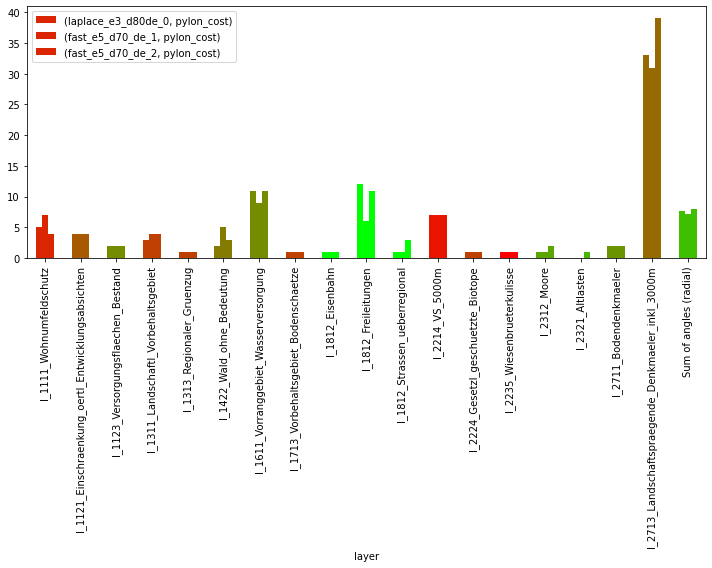

In [28]:
fig1, ax1 = plt.subplots(figsize=(10,8))
test_df.plot.bar(ax = ax1, rot=90, color=[rgbs, rgbs])
plt.gcf().subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.savefig("../../figure/abs_cost.png")

## QGIS preparation

In [471]:
SCALE_PARAM = 1
IOPATH = "../../data/belgium.nosync/data_dump_orig_" + str(SCALE_PARAM) + ".dat"
with open(IOPATH, "rb") as infile:
    data = pickle.load(infile)

In [475]:
for name, path in zip(json_names, path_list):
    coordinates = [data.transform_matrix * p for p in path]
    df = pd.DataFrame(np.asarray(coordinates), columns=["X", "Y"])
    out_path = os.path.join(json_path, name.split(".")[0])
    df.to_csv(out_path + "_coords.csv", index=False)

## Pylon - layer matrix

In [29]:
# first compute coordinates of pylons and cables
def path_to_edge_coords(path):
    is_pylon = []
    path_coords = []
    for p in range(len(path)-1):
        # add current pylon
        path_coords.append(path[p])
        is_pylon.append(1)
        # add cable
        line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )[1:-1]
        for l in line:
            path_coords.append(l)
            is_pylon.append(0)
    path_coords.append(path[-1])
    is_pylon.append(1)
    return path_coords, is_pylon
# plt.plot(np.array(path_coords)[:,0], np.array(path_coords)[:,1])

def pathline_to_matrix(arr, path_coords, is_pylon):
    out_matrix = np.zeros((len(arr),len(is_pylon)))
    is_pylon_helper = np.array(is_pylon)+1
    for i in range(len(arr)):
        count = 0
        for (m,n), is_py in zip(path_coords, is_pylon_helper):
            out_matrix[i,count] = arr[i, m,n] * is_py # +1 if pylon
            count+=1
    return out_matrix

def pylon_cable_matrix(arr, path):
    path_coords, is_pylon = path_to_edge_coords(path)
    return pathline_to_matrix(arr, path_coords, is_pylon)
    
def pylon_edge_matrix(arr, path):
    out_matrix = np.zeros((len(arr), 2*len(path)-1))
    for i in range(len(arr)):
        for p in range(len(path)-1):
            # add current pylon
            (x,y) = path[p]
            out_matrix[i,p*2] = arr[i,x,y] * 2 # other value for pylon than for cable       
            # add cable
            line = bresenham_line(
                        path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                    )[1:-1]
            out_matrix[i, p*2+1] = np.any([arr[i,x,y] for (x,y) in line])
    return out_matrix

def pylon_matrix(arr, path):
    out_matrix = np.zeros((len(arr),len(path)))
    for i in range(len(arr)):
        for j, (m,k) in enumerate(path):
            out_matrix[i,j] = arr[i, m,k]
    return out_matrix

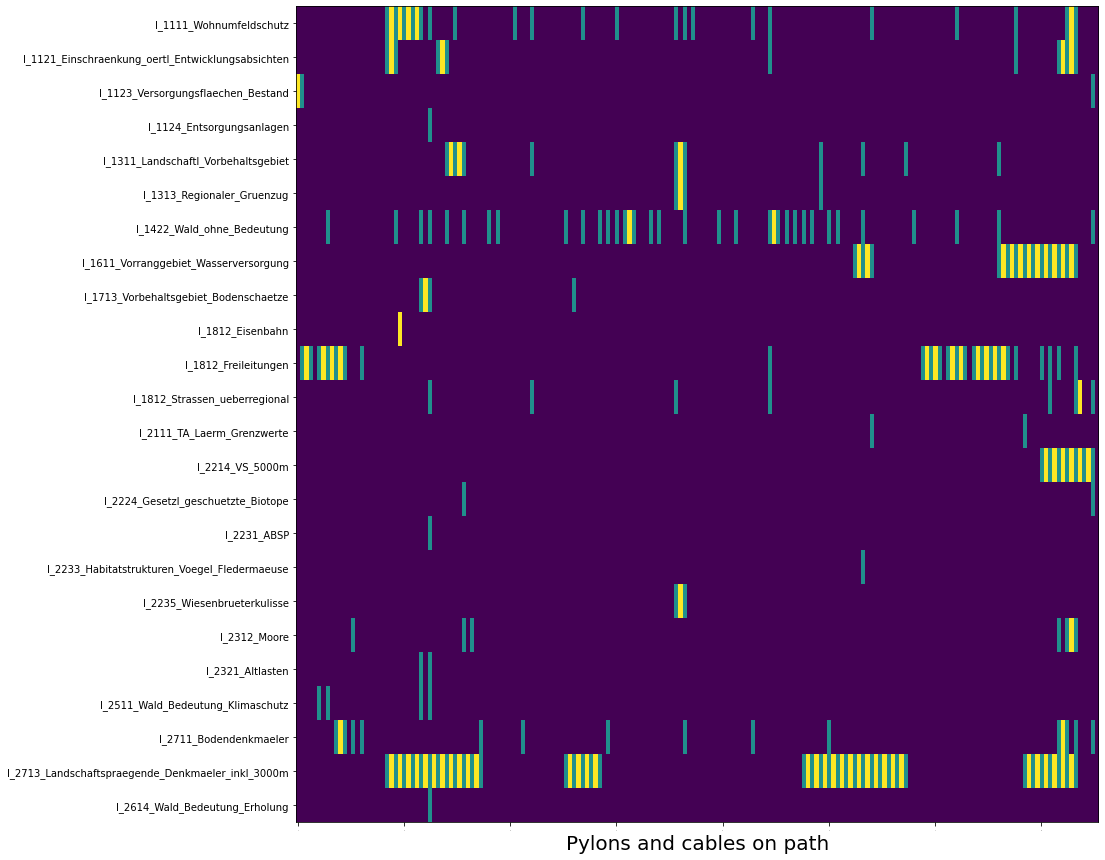

In [90]:
# OPTION 1: pylons and edges both as one field
path = path_list[0]
out_matrix = pylon_edge_matrix(arr, path)
# OPTION 2: all fields of cables seperately
# out_matrix = pylon_cable_matrix(arr, path)
# OPTION 3: simply take pylons, no cables considered
# out_matrix = pylon_matrix(arr, path)

# restrict to nonzero:
layer_labels = df["layer"].values[np.any(out_matrix, axis=1)]
out_matrix = out_matrix[np.any(out_matrix, axis=1)]
np.save("../../figure/pylon_cable_cost2.npy", out_matrix)

# PLOTTING
fig, ax = plt.subplots(figsize=(25,15))
ax.imshow(out_matrix)
ax.set_xticklabels([i for i in range(len(out_matrix[0]))], fontsize=1)
ax.set_yticklabels(layer_labels, fontsize=10)
# plt.xticks([i for i in range(len(is_pylon))])
plt.yticks([i for i in range(len(out_matrix))])
plt.xlabel("Pylons and cables on path", fontsize=20)
ax.set_aspect(aspect=8)
plt.savefig("../../figure/pylon_cable_cost2.png")
plt.show()

## Interactive plot

In [90]:
# Load data new
json_names = ["fast_e5_d70_de_0.csv", "fast_e5_d70_de_1.csv", "fast_e5_d70_de_2.csv","fast_e5_d70_de_3.csv","fast_e5_d70_de_4.csv"]
path_list = []
for csv in json_names:
    path_arr = np.asarray(pd.read_csv(os.path.join(json_path, csv))[["X_raw", "Y_raw"]]).astype(int)
    path_list.append(path_arr)

In [56]:
import mpld3

In [41]:
disp_inst = np.sum(np.array([arr[i]* df["weights"].values[i] for i in range(len(arr))]), axis=0)
disp_inst = (disp_inst-np.min(disp_inst))/(np.max(disp_inst)-np.min(disp_inst))

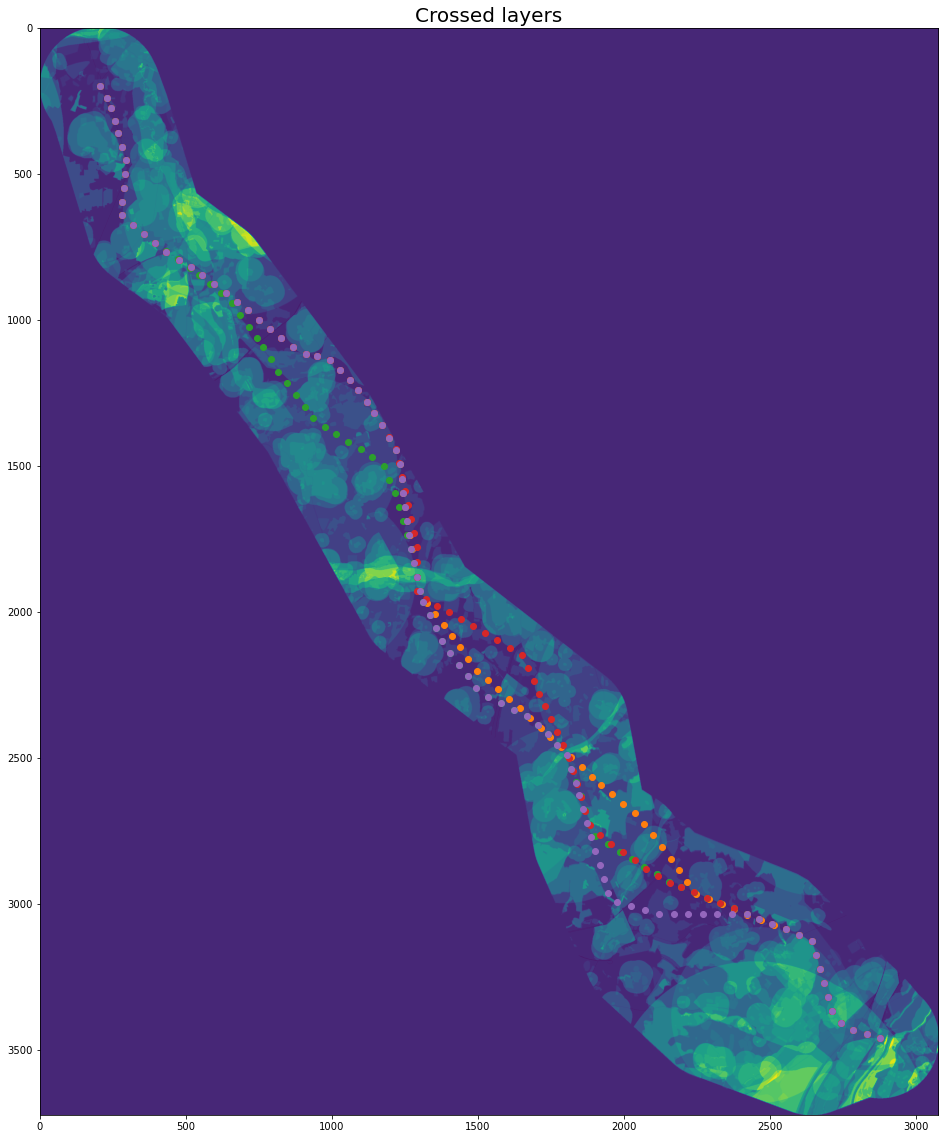

In [94]:

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(disp_inst)

ax.set_title("Crossed layers", size=20)

# path_colours = ["red", [200,200,200], [150,150,150]]

for p, path in enumerate(path_list):
    # construct labels: - TODO: merge
    label_list = []
    for (i,j) in path:
        current_labels = []
        for k in range(len(arr)):
            if arr[k, i,j]:
                # label_name = df["layer"].values[k]
                # only for de instance:
                name = df["layer"].values[k]
                label_name = " ".join(name.split("_")[2:])
                current_labels.append(label_name)
        if len(current_labels)>0:
            label_list.append(current_labels) # "\n".join(current_labels))
        else:
            label_list.append(["None"])
    
    # convert to HTML for formatting
    html_placeholder = "<p> <font size='4' color='white'>{title}</font>"
    labels = []
    for lab in label_list:
        fill_str = [html_placeholder.format(title=l) for l in lab]
        labels.append("".join(fill_str))

    # scatter
    scatter = ax.scatter(path[:,1], path[:,0])

    tooltip = mpld3.plugins.PointHTMLTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    # ax.grid(color='white', linestyle='solid')


# labels = label_list # ['point {0}'.format(i + 1) for i in range(len(test_path))]
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)

mpld3.save_html(fig, "test_interactive.html")

## Test edge cost comutation

because of edge_inst?

In [60]:
def edge_costs(layer_arr, path, normed=False):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # get connection line between two paths
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            # take the mean of each segment
            path_edges.append(np.mean([layer_arr[l,i,j] for (i,j) in line[1:-1]]))
        edge_costs.append(np.sum(path_edges))
    print(edge_costs)
    return edge_costs

def compute_edge_costs(path, instance, class_weights):
    costs = []
    for p in range(len(path) - 1):
        point_list = bresenham_line(
            path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
        )
        costs.append(np.mean([np.sum(instance[:, i, j]*class_weights) for (i, j) in point_list[1:-1]]))
    return np.sum(costs)

In [50]:
from power_planner.utils.utils_costs import CostUtils

In [64]:
edge_inst = instance.copy()
edge_inst[:, instance_corr==0] = 1

In [67]:
class_weights = np.array([0.28571429, 0.35714286, 0.14285714, 0.21428571])
for name, path in zip(json_names, path_list):
    shifted_path = np.asarray(path) - shift_to_origin
    out = compute_edge_costs(shifted_path, edge_inst, class_weights)
    print(name, out)
    # out2 = edge_costs(instance, shifted_path)
    # print(np.sum(out* class_weights), np.sum(out2*class_weights))

impl_0e_3a.json 11.791903827345422
impl_2e_2a.json 9.635710067137667
impl_3e_0a.json 9.403328948897446


In [35]:
shift_to_origin = data.orig_start - start_inds 
normed_df = class_df.copy()
for name, path in zip(json_names,path_list):
    normed_df[(name.split(".")[0], "pylon_cost", "weighted")] = pylon_costs(instance, np.asarray(path) - shift_to_origin)
    normed_df[(name.split(".")[0], "cable_costs", "weighted")] = cable_costs(instance, np.asarray(path) - shift_to_origin)
    normed_df[(name.split(".")[0], "edge_costs", "weighted")] = edge_costs(instance, np.asarray(path) - shift_to_origin)
normed_df

class impl_0e_3a                                               \
             edge_costs            pylon_cost            cable_costs   
               absolute   weighted   absolute   weighted    absolute   
0   cultural   3.302372   0.552296        2.0   0.307692        75.0   
1      human   0.000000   0.000000        0.0   0.000000         0.0   
2   planning  56.659563  23.955485       75.0  21.360000      1221.0   
3  technical  22.352235  20.259899       28.0  18.827586       481.0   

              impl_2e_2a                                               \
              edge_costs            pylon_cost            cable_costs   
     weighted   absolute   weighted   absolute   weighted    absolute   
0   12.538462   4.191700   0.658255        3.0   0.461538        96.0   
1    0.000000   0.000000   0.000000        0.0   0.000000         0.0   
2  512.880000  53.626413  23.680036       78.0  20.080000      1182.0   
3  433.931034  16.285442  20.607938       24.0  19.655172       356.0   

              impl_3e_0a                                               \
              edge_costs            pylon_cost            cable_costs   
     weighted   absolute   weighted   absolute   weighted    absolute   
0   15.076923   4.306512   0.669866        3.0   0.461538        99.0   
1    0.000000   0.000000   0.000000        0.0   0.000000         0.0   
2  518.160000  65.650066  23.901265      105.0  17.760000      1409.0   
3  451.758621  24.736285  21.024836       33.0  18.931034       538.0   

               
               
     weighted  
0   15.384615  
1    0.000000  
2  518.240000  
3  455.206897

## backup

In [ ]:
weighted_edge_costs.append(np.sum(weighted_edges))
    summed_pylon_costs.append(np.sum(df_grouped["pylon_costs"].values))
    summed_edge_costs.append(np.sum(df_grouped["cable_costs"].values))
    c.append(class_name)
class_df = pd.DataFrame()
class_df["class"] = c
class_df["pylon_costs"] = summed_pylon_costs
class_df["weighted_pylon_costs"] = weighted_pylon_costs
class_df["cable_costs"] = summed_edge_costs
class_df["weighted_cable_costs"] = weighted_edge_costs
class_df